# Step 1 EDA and Data Wrangling
## 0. Importing libraries and data

The data provided are contained in the folder 'data'. The folder contains 7 files:<br>

    1. holidays_events.csv
    2. oil.csv
    3. sample_submission.csv
    4. stores.csv
    5. test.csv
    6. train.csv
    7. transactions

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import gists

In [2]:
def understand_data_shapes(df):
    print('\n\n---------------{}---------------'.format(df.name))
    print('This dataframe contains {} rows, and {} columns'.format(df.shape[0], df.shape[1]))
    print('\n',df.head())

### import data

In [3]:
holidays_events = pd.read_csv(r'data/raw/holidays_events.csv')
holidays_events.name = 'holidays_events'

oil = pd.read_csv(r'data/raw/oil.csv')
oil.name = 'oil'

sample_submission = pd.read_csv(r'data/raw/sample_submission.csv')
sample_submission.name = 'sample_submission'

stores = pd.read_csv(r'data/raw/stores.csv')
stores.name = 'stores'

test = pd.read_csv(r'data/raw/test.csv')
test.name = 'test'

train = pd.read_csv(r'data/raw/train.csv')
train.name = 'train'

transactions = pd.read_csv(r'data/raw/transactions.csv')
transactions.name = 'transactions'

In [4]:
all_dataframe = [holidays_events, oil, sample_submission, stores, test, train, transactions]

## 1. Understand the data shape and column info

In [5]:
for dataframe in all_dataframe:
    understand_data_shapes(dataframe)



---------------holidays_events---------------
This dataframe contains 350 rows, and 6 columns

          date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  


---------------oil---------------
This dataframe contains 1218 rows, and 2 columns

          date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20


---------------sample_submission---------------
This dataframe contains 28512 ro

## 2. EDA by table

### holidays_events

#### This dataframe contains 350 rows, and 6 columns

Official description:<br>
- Holidays and Events, with metadata
- NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
- Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

In [6]:
# check column names
holidays_events.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

#### data type

In [7]:
# check data type 
holidays_events.dtypes

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

In [8]:
# update date data type
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

In [9]:
# new data type
holidays_events.dtypes

date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object

interesting, what are the different type of unique value? Does the locale_name match with the train and test data for store location?

#### null values?

In [10]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

#### summary data

In [11]:
holidays_events.describe()

C:\Users\cchan\AppData\Local\Temp/ipykernel_17652/1017088249.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  holidays_events.describe()


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25 00:00:00,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338
first,2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2017-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN


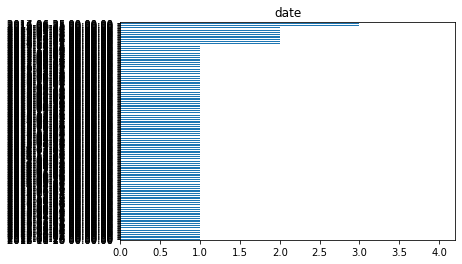

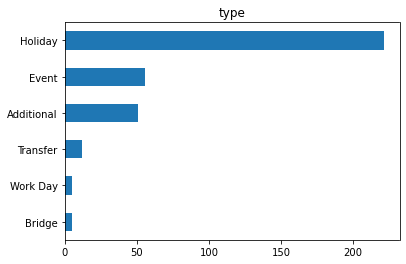

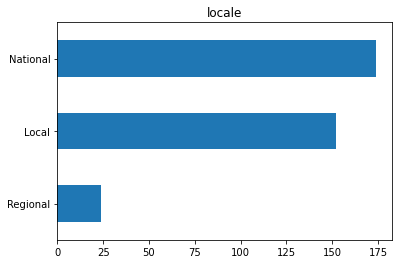

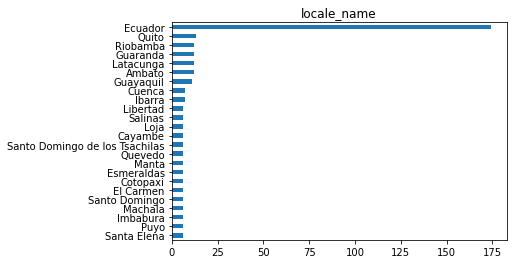

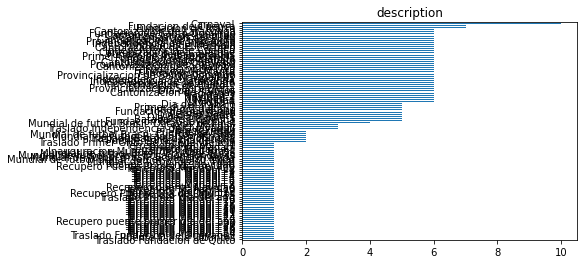

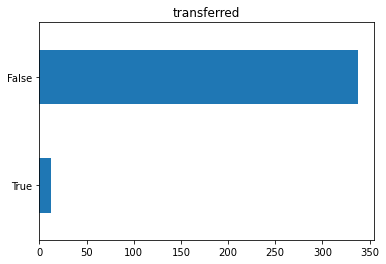

In [12]:
# no null values but are there weird unique values like 'empty' or '0000' that doesn't mean anything?

for col in holidays_events.columns:
    holidays_events[col].value_counts().sort_values().plot(kind = 'barh')
    plt.title(col)
    plt.show()

In [13]:
# what is the date range?

holidays_events['date'].describe(datetime_is_numeric=True)

count                              350
mean     2015-04-24 00:45:15.428571392
min                2012-03-02 00:00:00
25%                2013-12-23 06:00:00
50%                2015-06-08 00:00:00
75%                2016-07-03 00:00:00
max                2017-12-26 00:00:00
Name: date, dtype: object

From a brief look, looks like this table is very clean.

2 things to check later: #to-do

1. does locale translate to store locations in the future?
2. is this date range what I expect for the sales data later?

### oil
#### This dataframe contains 1218 rows, and 2 columns

Official descriptions:<br>
- Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [14]:
oil.columns

Index(['date', 'dcoilwtico'], dtype='object')

#### update data types

In [15]:
oil.dtypes

date           object
dcoilwtico    float64
dtype: object

In [16]:
oil['date'] = pd.to_datetime(oil['date'])

#### null values

In [17]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [18]:
oil[oil['dcoilwtico'].isnull() == True]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [19]:
## do we have other duplicate rows in these rows?
## ans: no.. these days are holidays. keep them as null

null_dates = oil[oil['dcoilwtico'].isnull() == True]['date']
oil[oil['date'].isin(null_dates)]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [20]:
# do we have missing dates in the days?
dates_in_oil = oil['date'].unique()
missing_dates = pd.date_range(start=oil['date'].min(), end=oil['date'].max()).difference(dates_in_oil)
print(missing_dates)

DatetimeIndex(['2013-01-05', '2013-01-06', '2013-01-12', '2013-01-13',
               '2013-01-19', '2013-01-20', '2013-01-26', '2013-01-27',
               '2013-02-02', '2013-02-03',
               ...
               '2017-07-29', '2017-07-30', '2017-08-05', '2017-08-06',
               '2017-08-12', '2017-08-13', '2017-08-19', '2017-08-20',
               '2017-08-26', '2017-08-27'],
              dtype='datetime64[ns]', length=486, freq=None)


In [21]:
# looks like these are Saturdays and Sundays.
# Do we have any days missing that aren't Saturday and Sundays?

missing_dates.dayofweek.unique()
# dayofweek starts at 0, so 5,6 are Saturday and Sundays.
# There aren't any missing dates that aren't Saturdays or Sundays.

Int64Index([5, 6], dtype='int64')

#### summary data

In [22]:
oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [23]:
oil['date'].describe(datetime_is_numeric=True)

count                   1218
mean     2015-05-02 12:00:00
min      2013-01-01 00:00:00
25%      2014-03-03 06:00:00
50%      2015-05-02 12:00:00
75%      2016-06-30 18:00:00
max      2017-08-31 00:00:00
Name: date, dtype: object

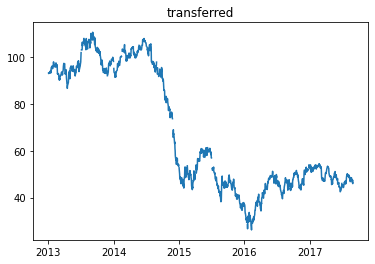

In [24]:
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title(col)
plt.show()

### sample_submission

#### This dataframe contains 28512 rows, and 2 columns.

Official description:<br>
- A sample submission file in the correct format.

In [25]:
# check column names
sample_submission.columns

Index(['id', 'sales'], dtype='object')

In [26]:
# check data type
sample_submission.dtypes

id         int64
sales    float64
dtype: object

In [27]:
# not sure what the sample_submission's id column mean...
# maybe some type of date format? or maybe it's store ID?
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


### stores

#### This dataframe contains 54 rows, and 5 columns

Official description:
- Store metadata, including city, state, type, and cluster.
- cluster is a grouping of similar stores.

In [28]:
stores.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

In [29]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [30]:
# check data type
stores.dtypes

store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object

In [31]:
# check null values
stores.isnull().sum() # no null values

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

#### summary data

In [32]:
stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


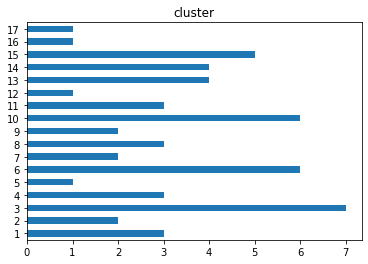

In [33]:
stores['cluster'].value_counts().sort_index().plot(kind='barh')
plt.title('cluster')
plt.show()

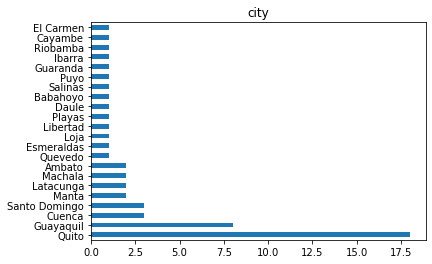

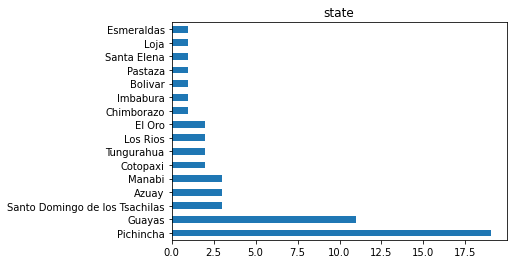

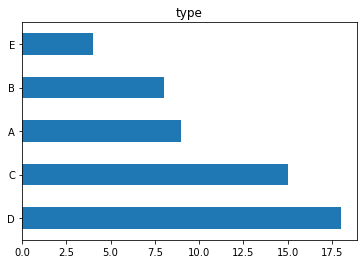

In [34]:
for col in ['city', 'state', 'type']:
    stores[col].value_counts().plot(kind='barh')
    plt.title(col)
    plt.show()

#### store_nbr is the unique identifier of each store.

In [35]:
print('There are {} number of rows in stores.csv file, and there are {} number of store_nbr.'.format(stores.shape[0], stores['store_nbr'].nunique()))

There are 54 number of rows in stores.csv file, and there are 54 number of store_nbr.


### test

#### This dataframe contains 28512 rows, and 5 columns

Official description:
- The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
- The dates in the test data are for the 15 days after the last date in the training data.

In [36]:
test.columns
# test dataset doesn't have a 'sales' column like in train dataset.

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion'], dtype='object')

In [37]:
test.head()

# looks like test dataset is where we make prediction and fill out the "sales column"
# then have the id and sales columns exported like sample_submission file

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


#### data types

In [38]:
# data types
test.dtypes

id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object

In [39]:
test['date'] = pd.to_datetime(test['date'])

In [40]:
# check new datatypes
test.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
onpromotion             int64
dtype: object

#### null values

In [41]:
# null values
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [42]:
# check if there's missing dates
dates_in_test = test['date'].unique()
print(pd.date_range(start=test.select_dtypes(include='datetime').min()[0], end=test.select_dtypes(include='datetime').max()[0]).difference(dates_in_test))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


#### summary data

In [43]:
test.select_dtypes(include=np.number).describe()
# not too sure what the onpromotion means, maybe it's items on promotion?

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [44]:
print('There are {} distinct datetime in the test dataset, with {} as smallest data, {} as largest date.'.format(test.select_dtypes(include='datetime').nunique()[0], test.select_dtypes(include='datetime').min()[0], test.select_dtypes(include='datetime').max()[0]))

There are 16 distinct datetime in the test dataset, with 2017-08-16 00:00:00 as smallest data, 2017-08-31 00:00:00 as largest date.


### train

#### This dataframe contains 3000888 rows, and 6 columns

Official description:
- The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
- store_nbr identifies the store at which the products are sold.
- family identifies the type of product sold.
- sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

In [45]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [46]:
train.head()

# looks like test dataset is where we make prediction and fill out the "sales column"
# then have the id and sales columns exported like sample_submission file

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


#### data types

In [47]:
# data types
train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [48]:
train['date'] = pd.to_datetime(train['date'])

In [49]:
# check new datatypes
train.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

#### null values

In [50]:
# null values
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [51]:
# check if there's missing dates
dates_in_train = train['date'].unique()
print(pd.date_range(start=train.select_dtypes(include='datetime').min()[0], end=train.select_dtypes(include='datetime').max()[0]).difference(dates_in_train))

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [52]:
# help, what should I do with missing dates?

#### summary data

In [53]:
train.select_dtypes(include=np.number).describe()
# not too sure what the onpromotion means, maybe it's items on promotion?

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [54]:
print('There are {} distinct datetime in the test dataset, with {} as smallest data, {} as largest date.'.format(train.select_dtypes(include='datetime').nunique()[0], train.select_dtypes(include='datetime').min()[0], train.select_dtypes(include='datetime').max()[0]))

There are 1684 distinct datetime in the test dataset, with 2013-01-01 00:00:00 as smallest data, 2017-08-15 00:00:00 as largest date.


In [55]:
1684/365

4.6136986301369864

In [56]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


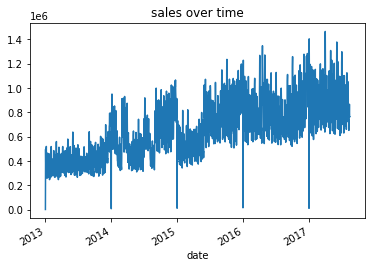

In [57]:
df_plot = pd.pivot_table(train, values='sales', index='date', aggfunc='sum')
df_plot.plot(legend=None)
plt.title('sales over time')
plt.show()

In [58]:
df = train
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

# sales per year
df.groupby('year').agg({'sales':'sum'})

,sales
year,
2013,1.404190e+08
2014,2.094742e+08
2015,2.408801e+08
2016,2.886545e+08
2017,1.942171e+08


In [59]:
# sales per month
# excluding 2017 because there are only data till august for 2017
df[df['year'] < 2017].groupby('month').agg({'sales':'sum'})

,sales
month,
1,6.811399e+07
2,5.738712e+07
3,7.052447e+07
4,6.477281e+07
5,6.748729e+07
6,6.883388e+07
7,7.635158e+07
8,7.103905e+07
9,7.747368e+07


In [77]:
train['family'].nunique()

33

In [69]:
pd.pivot_table(train, values='sales', index='family', aggfunc='sum').sort_values('sales', ascending=False)

,sales
family,
GROCERY I,3.434627e+08
BEVERAGES,2.169545e+08
PRODUCE,1.227047e+08
CLEANING,9.752129e+07
DAIRY,6.448771e+07
BREAD/BAKERY,4.213395e+07
POULTRY,3.187600e+07
MEATS,3.108647e+07
PERSONAL CARE,2.459205e+07


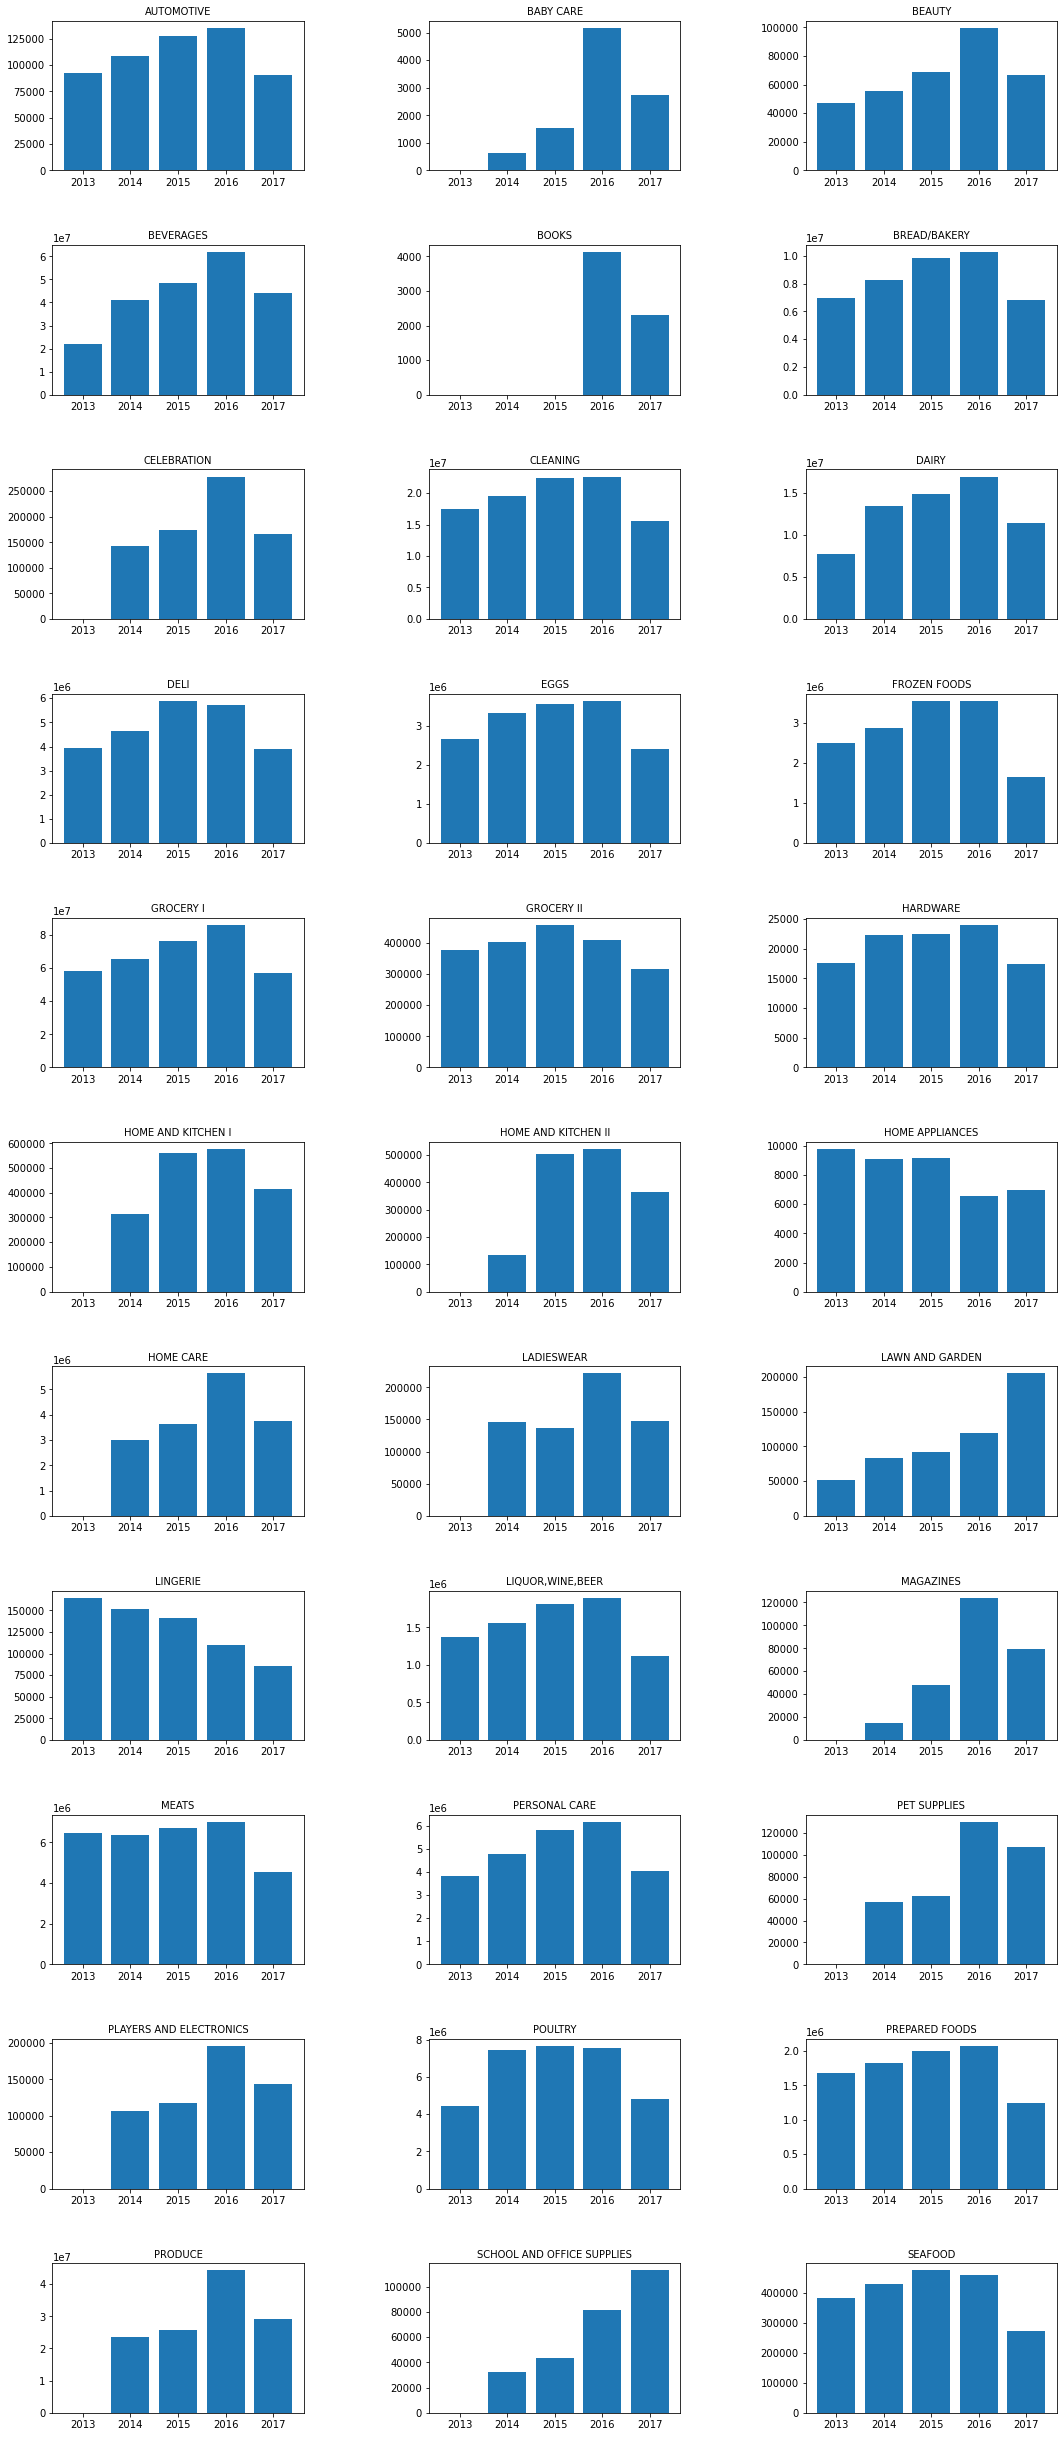

<Figure size 432x288 with 0 Axes>

In [111]:
df_plot = pd.pivot_table(train, values='sales', index=['family', 'year'], aggfunc='sum').reset_index()

fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(18, 44))

col_title = 0
for f, ax in zip(df_plot['family'].unique(), axes.flatten()):
    ax.bar(df_plot[df_plot['family'] == f]['year'], df_plot[df_plot['family'] == f]['sales'])
    ax.set_title(f, fontsize=10)
    plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

plt.suptitle('sales per category over time')
plt.show()

looks like each product family has a different trend. note: 2017 has only data up till august.

### transaction
#### This dataframe contains 83488 rows, and 3 columns

Official description:
- Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [113]:
transactions.columns

Index(['date', 'store_nbr', 'transactions'], dtype='object')

In [120]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


#### data types

In [117]:
transactions.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [119]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [121]:
transactions.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

#### null values

In [122]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [123]:
# check if there's missing dates
dates_in_transactions = transactions['date'].unique()
print(pd.date_range(start=transactions.select_dtypes(include='datetime').min()[0], end=transactions.select_dtypes(include='datetime').max()[0]).difference(dates_in_transactions))

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-01-01',
               '2016-01-03', '2016-12-25'],
              dtype='datetime64[ns]', freq=None)


In [124]:
# help missing dates again.. should I fill it? or leave it as null

#### summary data

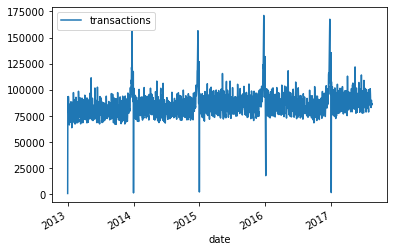

In [126]:
df_plot = transactions.pivot_table(index='date', values='transactions', aggfunc='sum')
df_plot.plot()
plt.show()

In [127]:
# to-do what are the average cost per transaction? 

# to-do:

eda: features:
- holiday (boolean) are there different holidays that has an impact?
- oil prices (increased decrease? how do we encode it?
- store -- prediction by store
- transaction count -- does the transaction number matter for redicting revenue? -- this is not a feature because it's not something that's provided in the test data
- sale -- if there's a sale for that day for that store for that category
- category -- what is the category

(regression with decision tree) - gradient boost, xg boost
fb prophet


1. combine holidays event with day
2. number of transaction per store per day (combine with holidays, oil prices,) --> use this in replacement of train
3. need to modify the testing data so I can use the test columns to test data.
4. output: just the summarized prediction -- meaning that I will most likely need to create a custom pipeline.
